## Plate Cooling Model of Lithosphere
At large distances from the oceanic ridges (or old plates), the heat flow observed was not as low as expected from the half-space cooling model (see notebook 8), and not much thermal difference between lithosphere
of 80 and 160 Myr of age was observed.

Therefore, plate cooling model was proposed to get a better fit to the data. In this model, a maximum thickness of lithosphere ($L$) is assumed and the base of the lithosphere is maintained at a constant temperature, $T_m$. To maintain a constant temperature at the plate's base, small-scale sub-lithospheric convection is suggested.

The boundary conditions for the problem in Eq.9 are now:

\begin{align}
    \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial z^2} \tag{9},
\end{align}

$T=T_s$ at the surface, $z=0$, $t >0$

$T=T_m$ at depths $z=L$, $t >0$

$T=T_m $ at $t =0$, $0\leq z \leq L$

A detailed derivation of the solution to the above problem satisfying the initial and boundary conditions has been given by Carslaw and Jaeger (1959, p. 100). Heat flow for the plate model is given by:

\begin{align}
  q_0(t) = \frac{k(Tm - Ts)}{L} \left[ 1 + 2 \sum_{n=1}^{\infty} \exp \left( \frac{-n ^2 \pi^2 \kappa t}{L^2} \right) \right]
\end{align}

At large times (far from the ridge axis), an equilibirum linear profile emerges from this equation:

\begin{align}
  T =  T_s + (T_m - T_s)(\frac{z}{z_L}) \tag{12},
\end{align}

Equation 12 can be used to define the conductive temperature profile of continental lithospheres.

In [1]:
import numpy as  np
import matplotlib.pyplot as plt

In [2]:
# Let's define the typical values for the oceanic lithosphere
# We use SI units to define all our variables and constants

surface_temperature  = 273   # [K]
mantle_temperature   = 1573  # [K]
thermal_diffusivity  = 1e-6  # m^2/s
thermal_conductivity = 3.3   # W/m K
max_lith_thickness   = 100e3 # m

year_to_seconds      = 365 * 24 * 3600

In [28]:
def exponential_term (n, t):
    '''
        This function approximates the exponential term at a given n value
        in the heat flow equation for a plate cooling model.
        
        Inputs
        ----------
        n : int
            Compute the exponential series at this n value.
        t : int 
            Age (seconds) of the oceanic plate.
            
        Output
        ----------
        double
            Value of the exponential term for the given input parameters.
        
    '''
    return np.exp((-n*n * np.pi*np.pi * thermal_diffusivity * t * year_to_seconds)/ \
         (max_lith_thickness*max_lith_thickness))


def surface_heat_flow_plate_model(N, t):
    '''
       This function computes the surface heat flow using the plate cooling model of 
       lithosphere.
    
       Inputs
       ----------
       N : int
           Total number of exponential terms used to approximate infinite sum series. 
           We want to make this number as large as possible without affecting the 
           compute time too much.
       t : int
           Age (seconds) of the oceanic plate.
    
       Output
       ----------
       double
           Surface heat flow for following the plate cooling model for a given age of the 
           oceanic plate.
    '''
    
    sum = 0
    n   = 1

    while (n <= N):
        sum += exponential_term(n , t)
        n   += 1

    heat_flow = (thermal_conductivity * (mantle_temperature - surface_temperature)/max_lith_thickness) * \
                (1 + 2 * sum)

    return heat_flow

In [29]:
time  = np.arange(1, 200e6, 1e6)
num   = 10000

heat_flow_plate_model = surface_heat_flow_plate_model(num, time)
heat_flow_half_space  = thermal_conductivity * (mantle_temperature - surface_temperature) / \
                        (np.sqrt (np.pi * thermal_diffusivity * time * year_to_seconds))

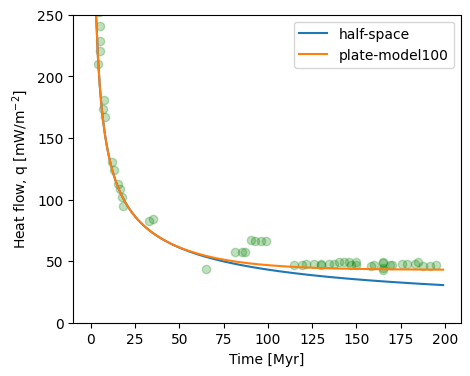

In [40]:
# Now, let's plot the heat flow due to the plate model with max lithosphere
# thickness 100 km , the half space cooling model (discussed earlier), and the
# observed heat flow values

data_observed = np.loadtxt('files/Lister_heat_flow_from_plot.txt', delimiter=",")
heat_flow_observed = data_observed[:, 1]
plate_age_observed = data_observed[:, 0]

fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
ax1.plot(time/(1e6), heat_flow_half_space*1e3, label='half-space') # heat flux in mW/m^2
ax1.plot(time/(1e6), heat_flow_plate_model*1e3, label='plate-model-100')
ax1.scatter(plate_age_observed, heat_flow_observed, c='green', alpha=0.25)

ax1.set_ylim([0, 250])
ax1.set_xlabel('Time [Myr]')
ax1.set_ylabel('Heat flow, q [mW/m$^{-2}$]')

plt.legend()

----
## Futher Reading

A comparision of the oceanic lithopsheric temperature profile with the plate cooling and half-space cooling models can be found in the study:  Hager, Bradford H. "Global isostatic geoid anomalies for plate and boundary layer models of the lithosphere." [Earth and Planetary Science Letters 63.1 (1983): 97-109](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/93JB02696)